<a href="https://colab.research.google.com/github/GilgameshxZero/utulek/blob/master/mnist/mnist_class_avgs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab setup

In [1]:
!pip install mnist

# Dataset setup

In [0]:
import pathlib
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mnist

In [0]:
TMP_DIR = "./tmp/"

In [0]:
pathlib.Path(TMP_DIR).mkdir(parents=True, exist_ok=True)

train_x = mnist.download_and_parse_mnist_file(
  "train-images-idx3-ubyte.gz",
  target_dir=TMP_DIR
)
train_y = mnist.download_and_parse_mnist_file(
  "train-labels-idx1-ubyte.gz",
  target_dir=TMP_DIR
)
test_x = mnist.download_and_parse_mnist_file(
  "t10k-images-idx3-ubyte.gz",
  target_dir=TMP_DIR
)
test_y = mnist.download_and_parse_mnist_file(
  "t10k-labels-idx1-ubyte.gz",
  target_dir=TMP_DIR
)

train_x.shape: (60000, 28, 28)
train_y.shape: (60000,)
test_x.shape: (10000, 28, 28)
test_y.shape: (10000,)

train_x[43241] is a 2


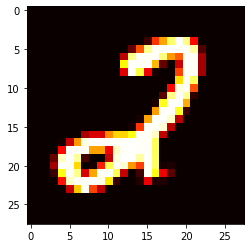

In [5]:
print("train_x.shape:", train_x.shape)
print("train_y.shape:", train_y.shape)
print("test_x.shape:", test_x.shape)
print("test_y.shape:", test_y.shape)
print()

sample_idx = random.randint(0, train_y.shape[0] - 1)
print("train_x[{}] is a".format(sample_idx), train_y[sample_idx])
plt.imshow(train_x[sample_idx], cmap="hot", interpolation="nearest")
plt.show()

# Class averages

In [0]:
class_avgs = np.array([
  np.average(
    train_x,
    axis=0, 
    weights=np.equal(train_y, a)
  ) for a in range(10)
])

Class averages:


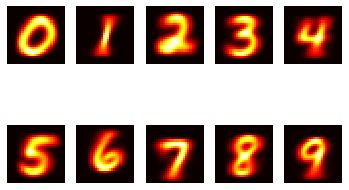

In [7]:
print("Class averages:")
for a in range(10):
  plt.subplot(2, 5, a + 1)
  plt.imshow(class_avgs[a], cmap="hot", interpolation="nearest")
  plt.axis("off")
plt.show()

In [8]:
cavg_test_mul = np.array([[
    test_x[a] * class_avgs[b] for b in range(10)
  ] for a in range(test_y.shape[0])
])
print("cavg_test_mul.shape:", cavg_test_mul.shape)

cavg_test_mul.shape: (10000, 10, 28, 28)


In [9]:
cavg_sum_mul = np.sum(cavg_test_mul, axis=(2,3))
cavg_preds = np.argmax(cavg_sum_mul, axis=1)
print("Prediction shape:", cavg_preds.shape)
cavg_correct = np.equal(cavg_preds, test_y)
accuracy = np.count_nonzero(cavg_correct) / test_y.shape[0]
print("Accuracy:", accuracy)

Prediction shape: (10000,)
Accuracy: 0.631


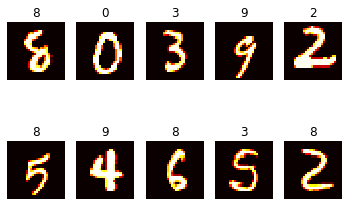

In [10]:
idx = np.arange(cavg_correct.shape[0])
for a in range(5):
  sample_idx = np.random.choice(idx[cavg_correct])
  plt.subplot(2, 5, a + 1)
  plt.imshow(test_x[sample_idx], cmap="hot", interpolation="nearest")
  plt.axis("off")
  plt.title(cavg_preds[sample_idx])
for a in range(5):
  sample_idx = np.random.choice(idx[cavg_correct == False])
  plt.subplot(2, 5, a + 6)
  plt.imshow(test_x[sample_idx], cmap="hot", interpolation="nearest")
  plt.axis("off")
  plt.title(cavg_preds[sample_idx])
plt.show()